# stroke-alert

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

## Data Cleaning

In [5]:
df = pd.read_csv("AVC.csv")

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Deleting ID, ever_married values columns, and BMI values that are superior to 69:

In [8]:
df = df.drop('id', axis=1)
df = df.drop('ever_married', axis=1)
df = df.drop(df[df['bmi'] >= 69].index) #IMC de 59 correspond à 170cm 200 Kg, les valeurs max sont à 97,6 (abérant)
df[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,5106.000000,5106.000000,4905.000000
mean,43.236976,106.152673,28.847584
std,22.616627,45.265408,7.687068
min,0.080000,55.120000,10.300000
25%,25.000000,77.282500,23.500000
50%,45.000000,91.890000,28.000000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,66.800000


### Change categorical variables to binary

In [50]:
#df=pd.get_dummies(df, columns = ['smoking_status'])
df=df.apply(LabelEncoder().fit_transform)

### Gender

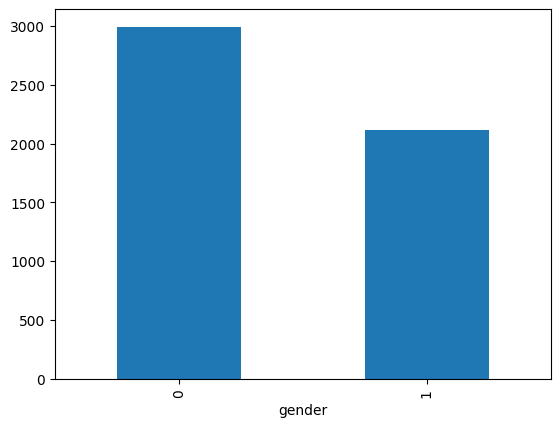

In [45]:
df.gender.value_counts().plot(kind='bar')
plt.show()

Cleaning 1 data sample with gender 'Other' (2)

In [44]:
df = df.drop(df[df['gender'] == 2].index)

### Residence type

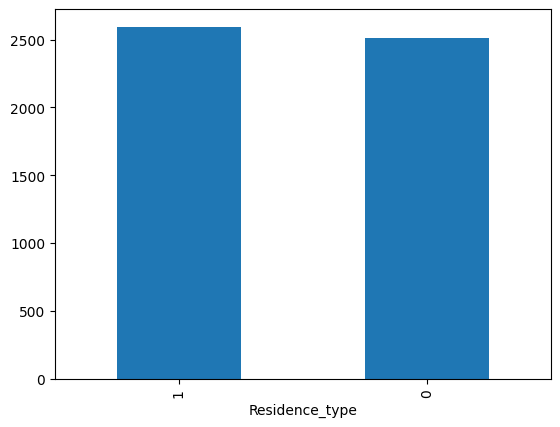

In [49]:
df.Residence_type.value_counts().plot(kind='bar')
plt.show()

In [11]:
#df.ever_married.value_counts().plot(kind='bar')
#plt.show()

### Work type

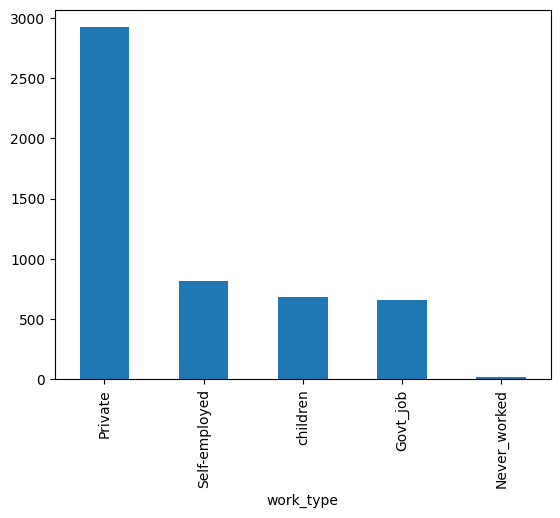

In [12]:
df.work_type.value_counts().plot(kind='bar')
plt.show()

### Smoking status

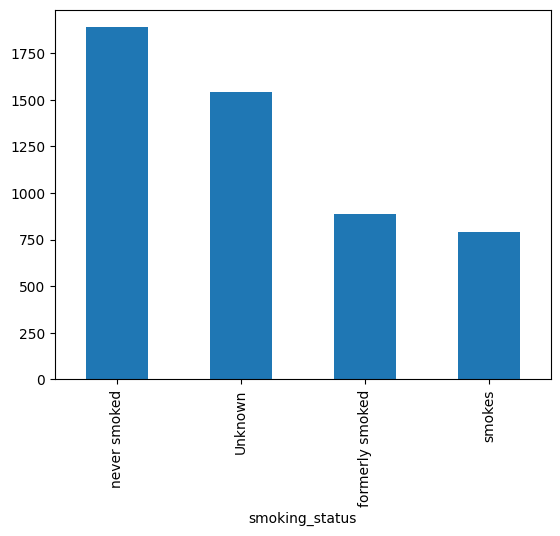

In [13]:
df.smoking_status.value_counts().plot(kind='bar')
plt.show()

### Stroke

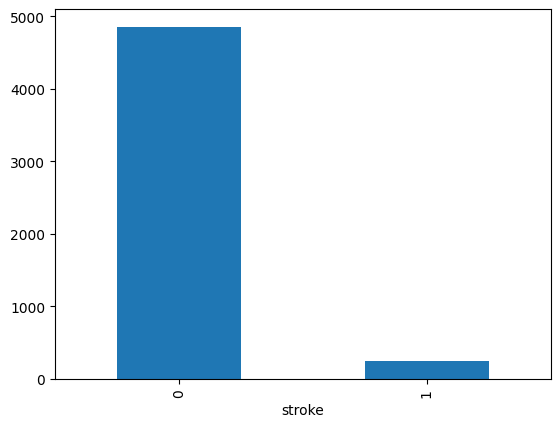

In [14]:
df.stroke.value_counts().plot(kind='bar')
plt.show()

### Hypertension

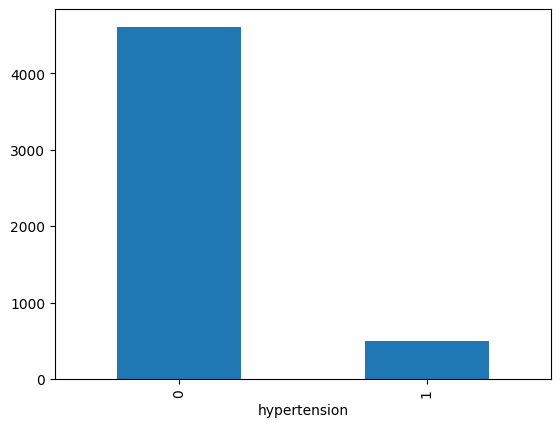

In [15]:
df.hypertension.value_counts().plot(kind='bar')
plt.show()

### Heart disease

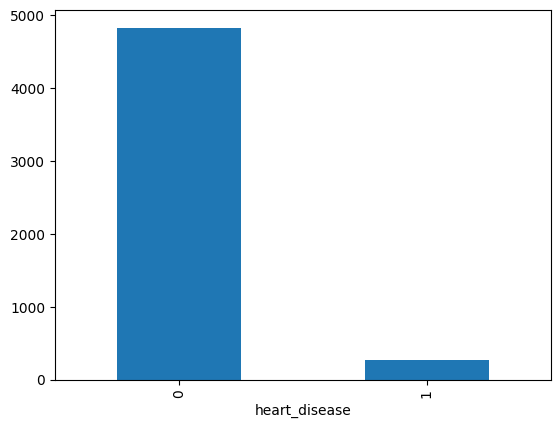

In [16]:
df.heart_disease.value_counts().plot(kind='bar')
plt.show()

### Correlation & Association

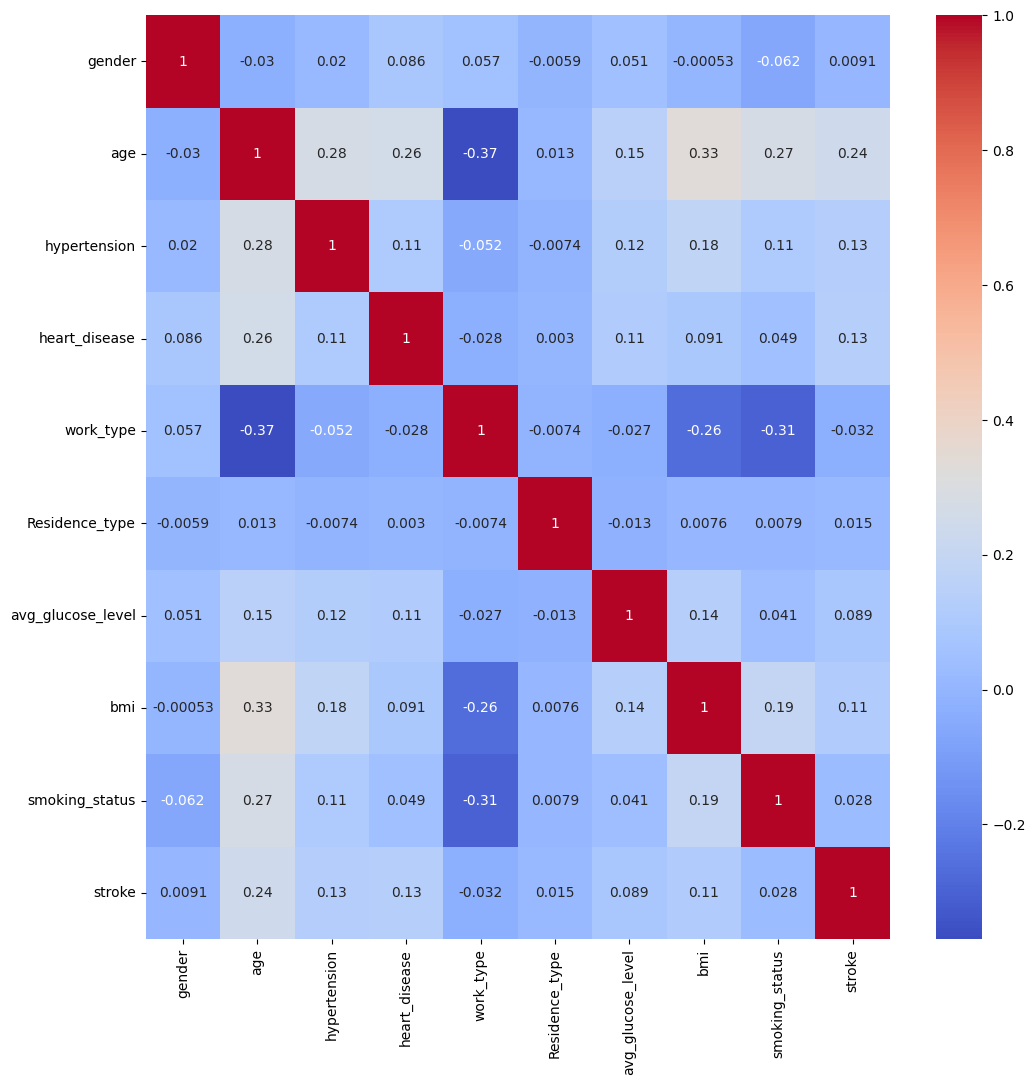

In [18]:
cor = df.corr()
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm');

In [19]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,2,1,3848,239,1,1
1,0,82,0,0,3,0,3587,414,2,1
2,1,101,0,1,2,0,2482,198,2,1
3,0,70,0,0,2,1,3384,217,3,1
4,0,100,1,0,3,0,3393,113,2,1


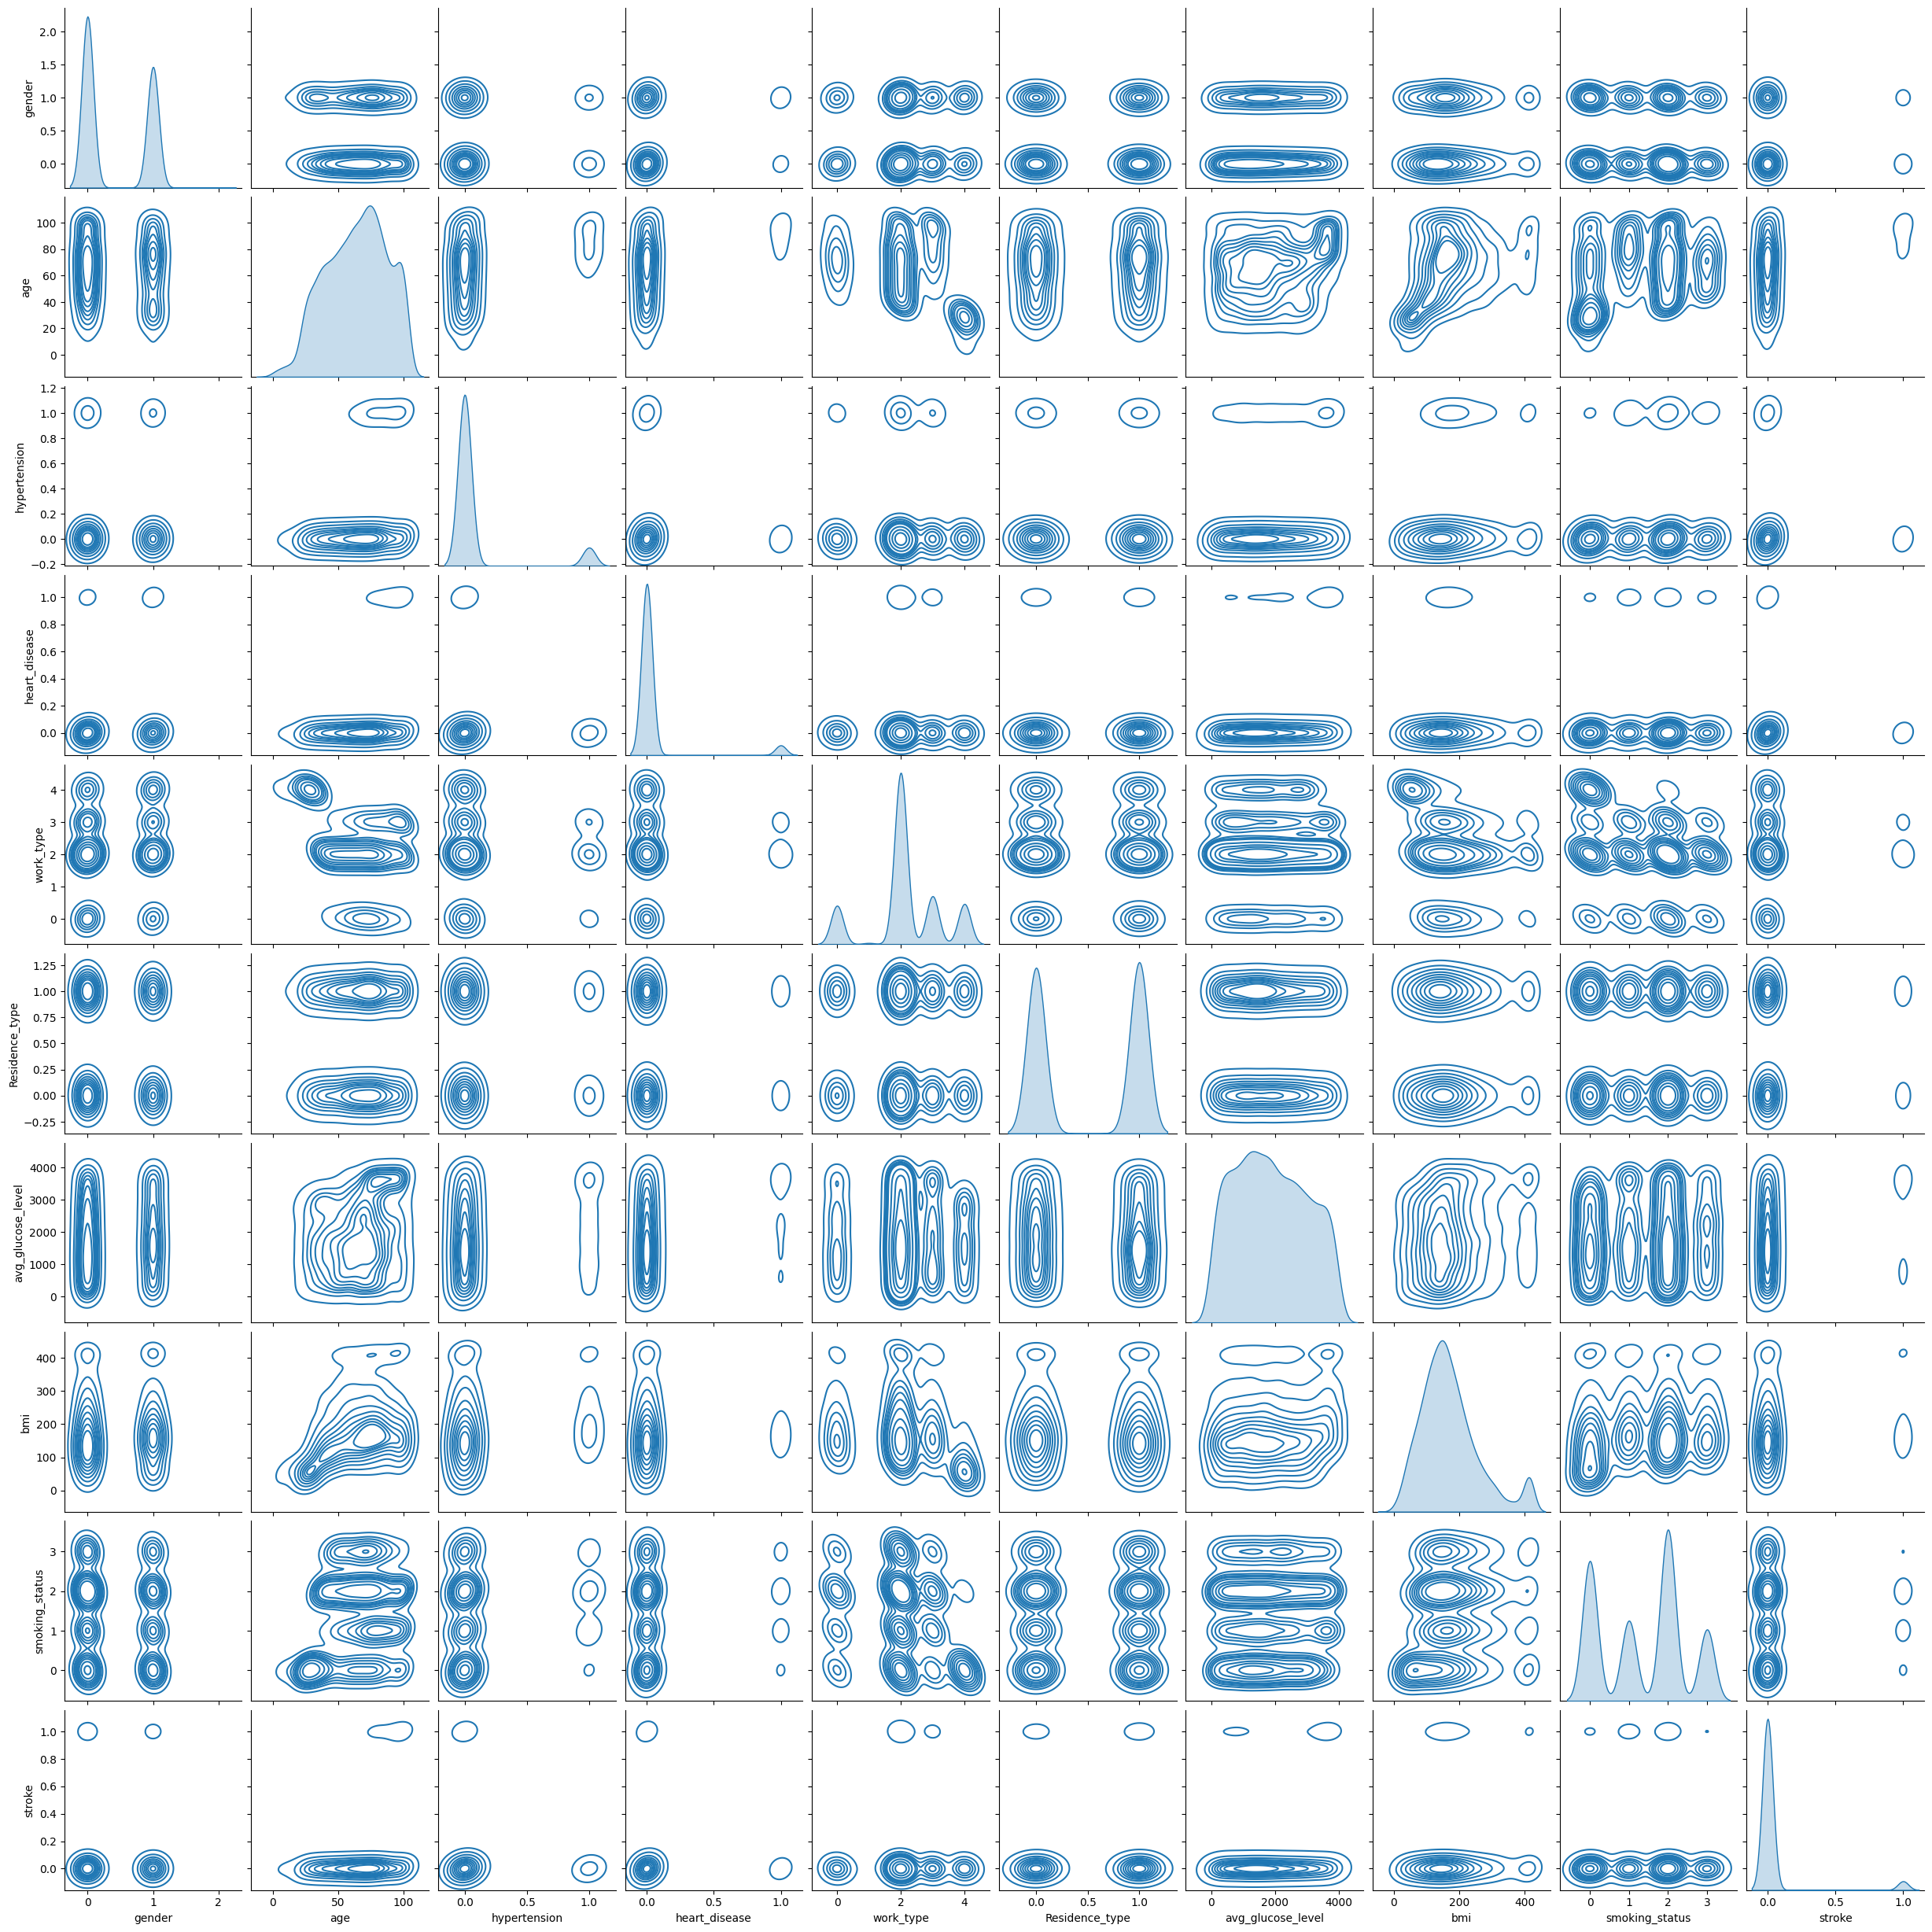

In [20]:
sns.pairplot(df,kind="kde")

## Supervised classification (with 1 feature)

In [21]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,2,1,3848,239,1,1
1,0,82,0,0,3,0,3587,414,2,1
2,1,101,0,1,2,0,2482,198,2,1
3,0,70,0,0,2,1,3384,217,3,1
4,0,100,1,0,3,0,3393,113,2,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1),df['stroke'],test_size = .2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forrest

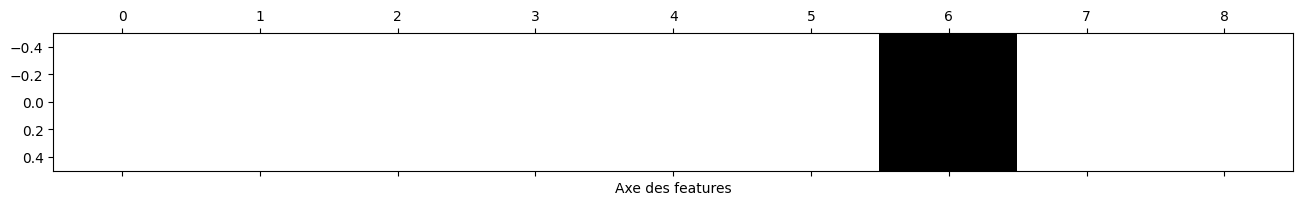

In [23]:
rfc1 = RandomForestClassifier()
rfe = RFE(estimator=rfc1, step=1, n_features_to_select = 1)
rfe.fit(X_train, y_train)
mask = rfe.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');


In [24]:
mask

array([False, False, False, False, False, False,  True, False, False])

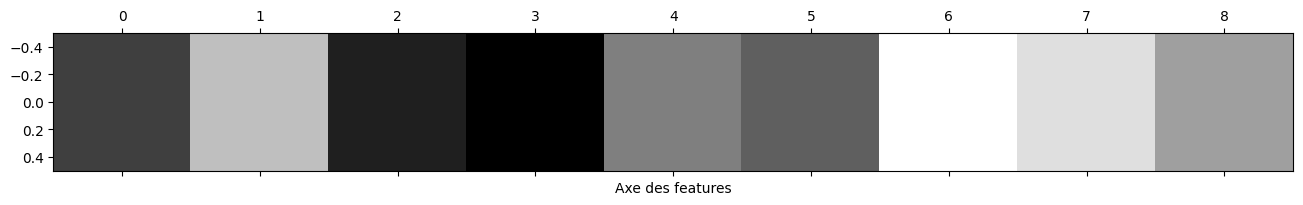

In [25]:
ranking = rfe.ranking_
plt.matshow(ranking.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');
plt.show();

In [26]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,2,1,3848,239,1,1
1,0,82,0,0,3,0,3587,414,2,1
2,1,101,0,1,2,0,2482,198,2,1
3,0,70,0,0,2,1,3384,217,3,1
4,0,100,1,0,3,0,3393,113,2,1


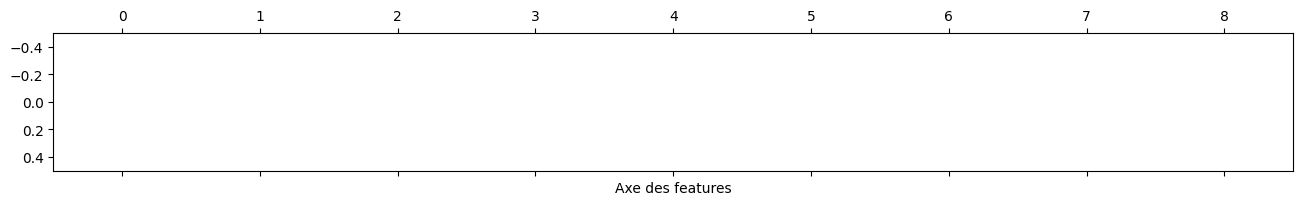

In [27]:
lm = LinearRegression()
rfc = RandomForestClassifier()

crossval = KFold(n_splits = 5, random_state = 2, shuffle = True)
rfecv = RFECV(estimator=rfc, cv = crossval, step=1)
rfecv.fit(X_train, y_train)

mask = rfecv.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');
plt.show();


Nombre de features retenus : 9


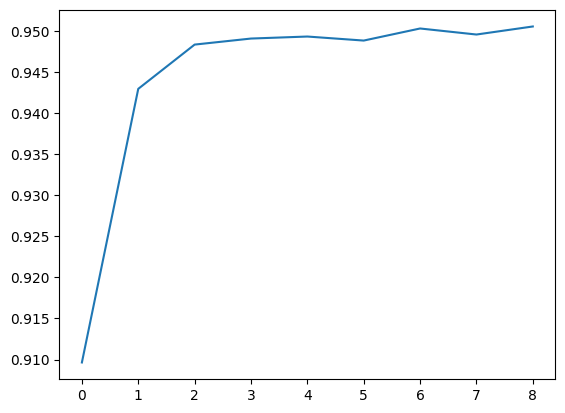

In [28]:
plt.plot(rfecv.cv_results_['mean_test_score']);
print("Nombre de features retenus :", rfecv.n_features_)

In [29]:
rfecv.cv_results_['mean_test_score']

array([0.90964732, 0.94294796, 0.94833351, 0.94906881, 0.94931421,
       0.94882341, 0.9502931 , 0.9495584 , 0.9505379 ])

In [30]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,2,1,3848,239,1,1
1,0,82,0,0,3,0,3587,414,2,1
2,1,101,0,1,2,0,2482,198,2,1
3,0,70,0,0,2,1,3384,217,3,1
4,0,100,1,0,3,0,3393,113,2,1


In [31]:
#séparer correlation variable continu/discontinu et pearson ou dautre metrics

In [32]:
#fumeur unknown : cb sont stroke ? si 0 ou très peu : delete !?

In [33]:
#enelver enfant sous 8ans